In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# increase the maximum number of rows displayed
pd.set_option('display.max_rows', 500)

In [34]:
df = pd.read_csv('results.csv')
df.head()

,method,n,p,rho,loss,time,it,conv,num_non_zero
0,coord,100,1000,0.0,94.583742,1.170947,94.266667,1.0,69.266667
1,coord_shuffle,100,1000,0.0,94.583742,1.690786,132.866667,1.0,69.266667
2,LARS,100,1000,0.0,94.583742,0.013778,NaN,NaN,69.266667
3,coord,100,1000,0.1,88.062482,1.116696,89.266667,1.0,64.800000
4,coord_shuffle,100,1000,0.1,88.062482,1.546620,123.800000,1.0,64.800000


In [43]:
df[df["method"] == "coord_shuffle"].groupby(["method", "n", "p", "rho"]).mean()["time"]

method         n     p     rho 
coord_shuffle  100   1000  0.00     1.690786
                           0.10     1.546620
                           0.20     1.536913
                           0.50     1.479158
                           0.90     1.051625
                           0.95     1.369417
                     5000  0.00    30.425669
                           0.10    31.737317
                           0.20    33.165577
                           0.50    29.278704
                           0.90    14.208378
                           0.95    16.704371
               1000  100   0.00     0.015697
                           0.10     0.019517
                           0.20     0.023093
                           0.50     0.040542
                           0.90     0.163661
                           0.95     0.243868
               5000  100   0.00     0.027339
                           0.10     0.042876
                           0.20     0.051269
                       

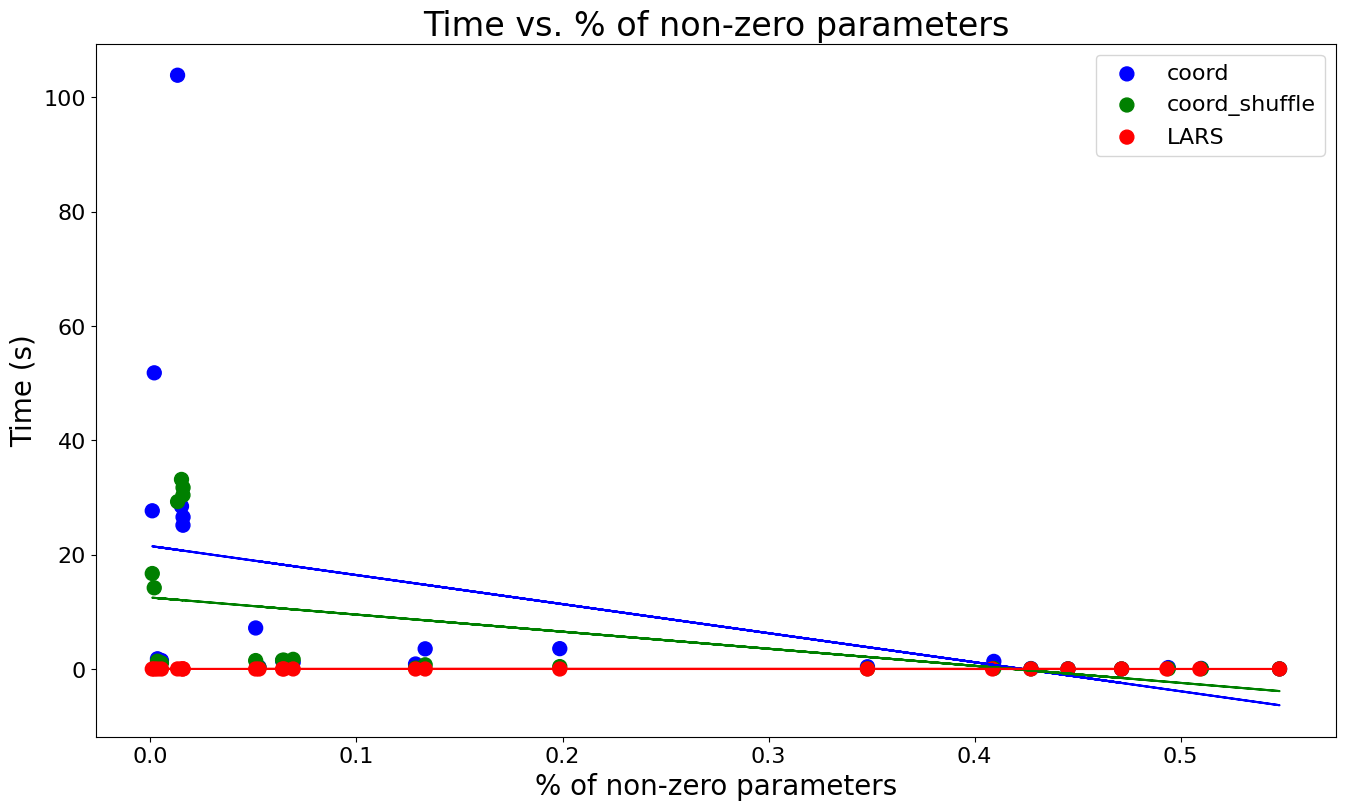

In [31]:
df["proc_non_zero"] = df["num_non_zero"] / df["p"]
plt.figure(figsize=(16, 9))
colors = {"LARS": "red", "coord": "blue", "coord_shuffle": "green"}
for method in df["method"].unique():
    df_method = df[df["method"] == method]
    plt.scatter(df_method["proc_non_zero"], df_method["time"], s=100, label=method, c=df_method["method"].map(colors))
    # plot the line of best fit
    z = np.polyfit(df_method["proc_non_zero"], df_method["time"], 1)
    p = np.poly1d(z)
    plt.plot(df_method["proc_non_zero"], p(df_method["proc_non_zero"]), c=colors[method])
plt.xlabel("% of non-zero parameters", fontsize=20)
plt.ylabel("Time (s)", fontsize=20)
plt.title("Time vs. % of non-zero parameters", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# plt.yscale("log")
plt.show()

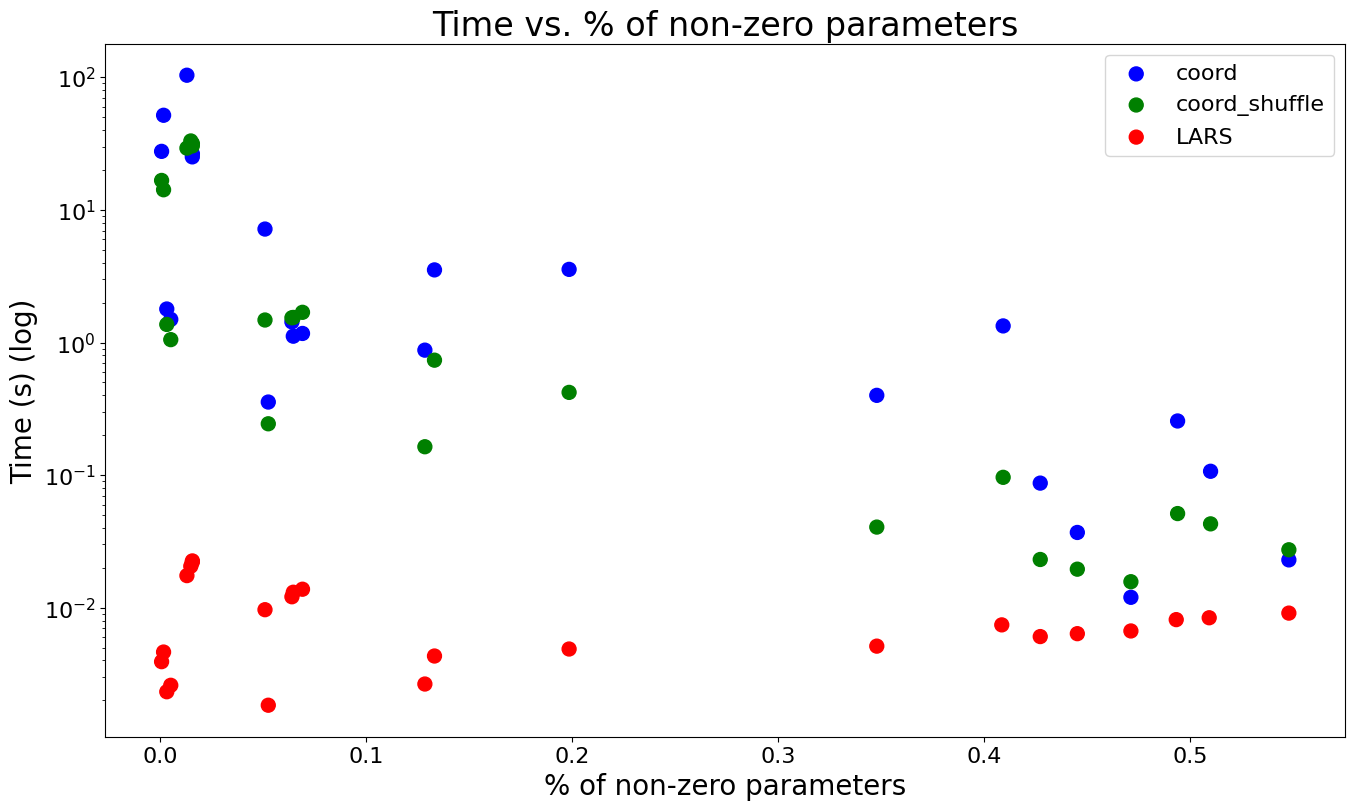

In [35]:
df["proc_non_zero"] = df["num_non_zero"] / df["p"]
plt.figure(figsize=(16, 9))
colors = {"LARS": "red", "coord": "blue", "coord_shuffle": "green"}
for method in df["method"].unique():
    df_method = df[df["method"] == method]
    plt.scatter(df_method["proc_non_zero"], df_method["time"], s=100, label=method, c=df_method["method"].map(colors))
plt.xlabel("% of non-zero parameters", fontsize=20)
plt.ylabel("Time (s) (log)", fontsize=20)
plt.title("Time vs. % of non-zero parameters", fontsize=24)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale("log")
plt.show()

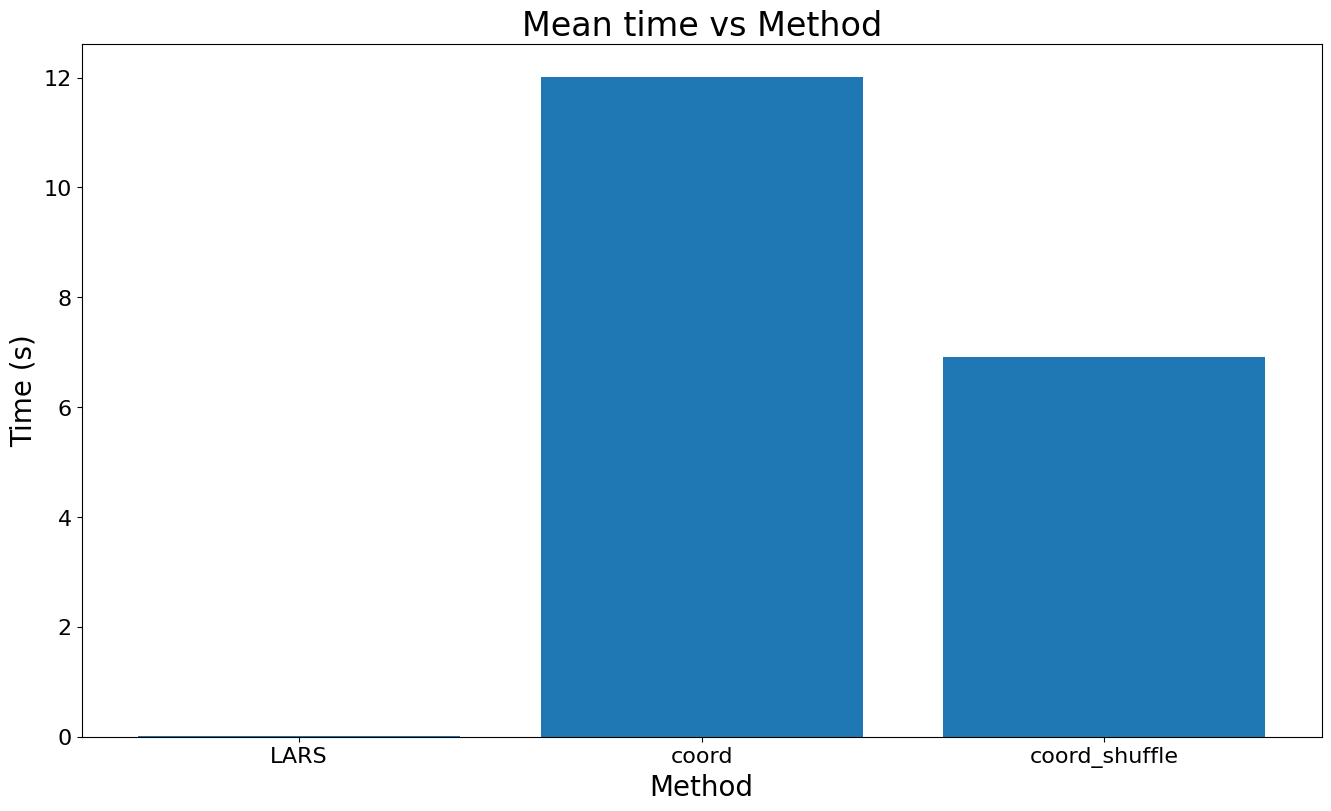

In [5]:
# Mean time for each method
mean_time = df.groupby('method')['time'].mean()
plt.figure(figsize=(16, 9))
plt.bar(mean_time.index, mean_time)
plt.xlabel('Method', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
plt.title('Mean time vs Method', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

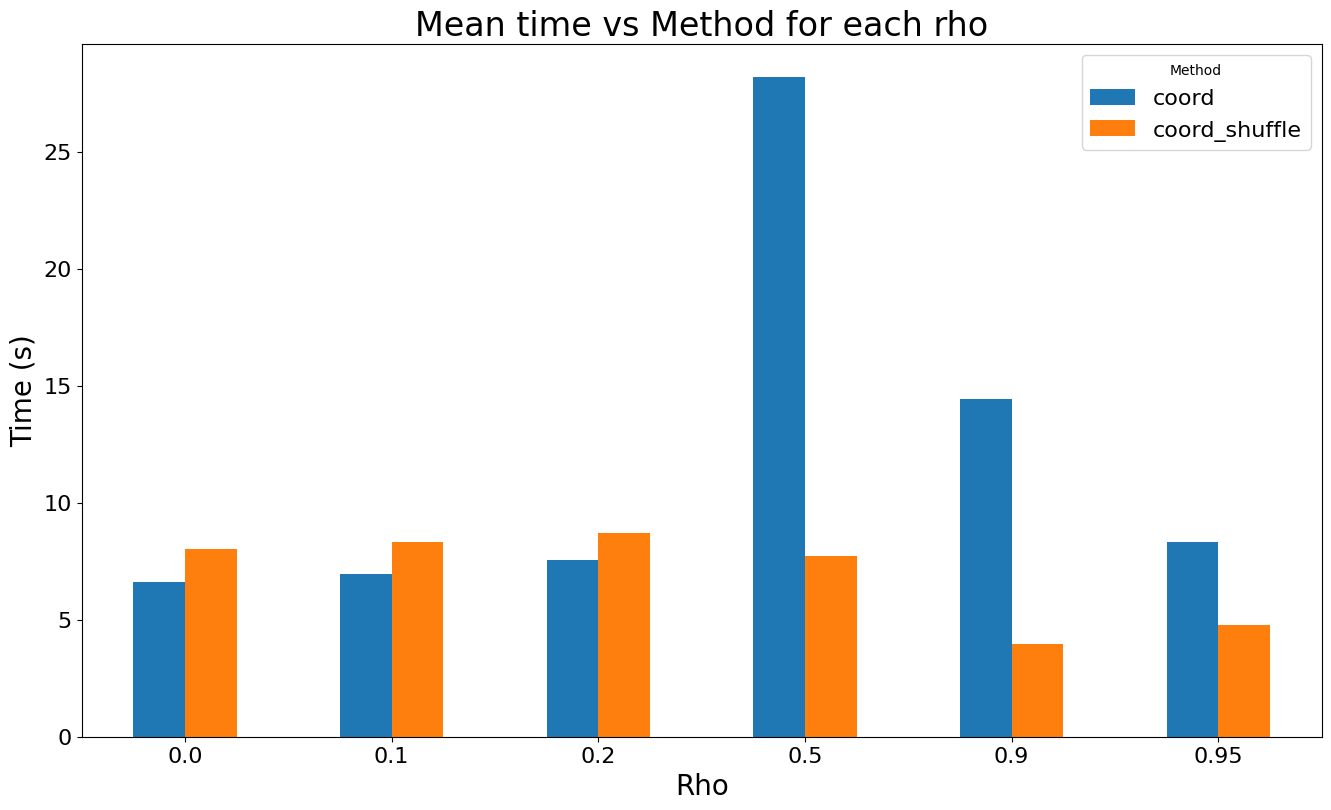

In [24]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['rho', 'method'])['time'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('Rho', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
plt.title('Mean time vs Method for each rho', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()

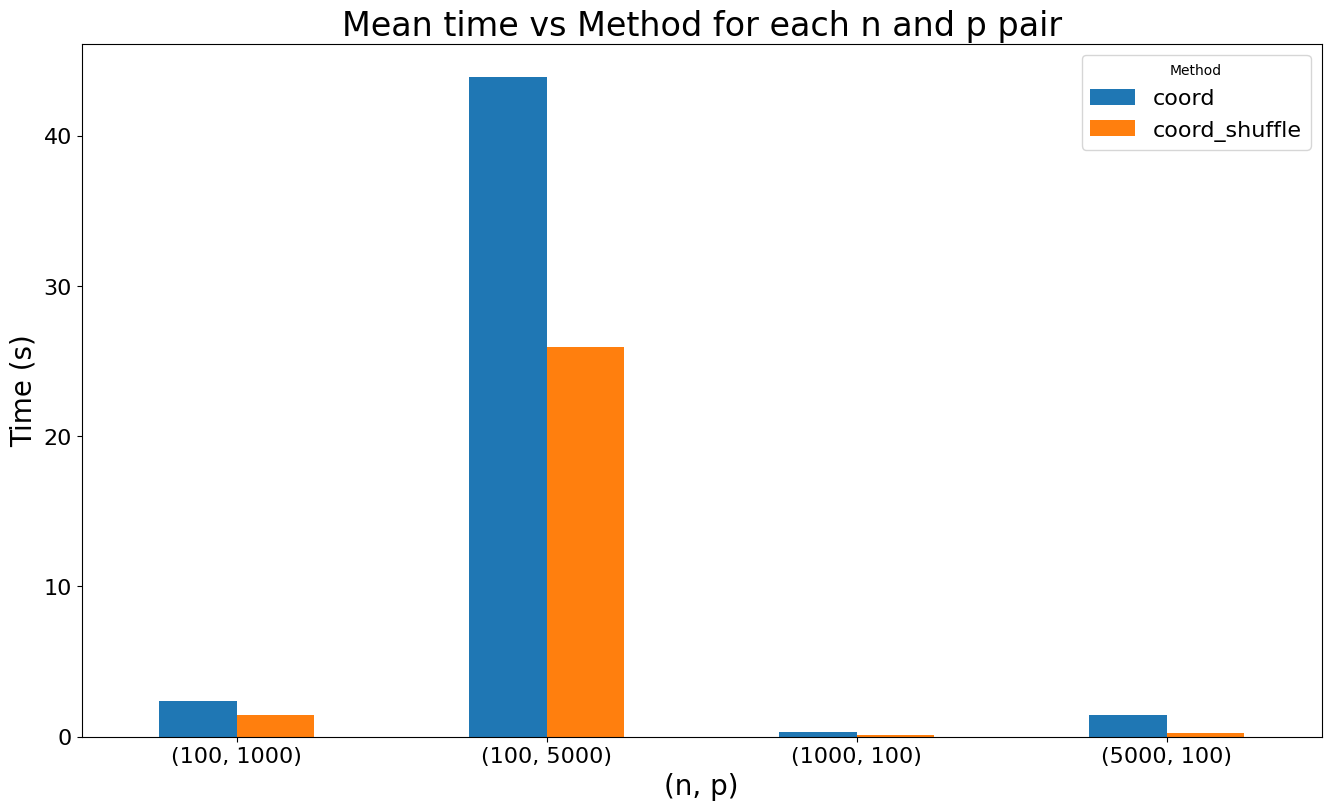

In [22]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['n', 'p', 'method'])['time'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('(n, p)', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
plt.title('Mean time vs Method for each n and p pair', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()

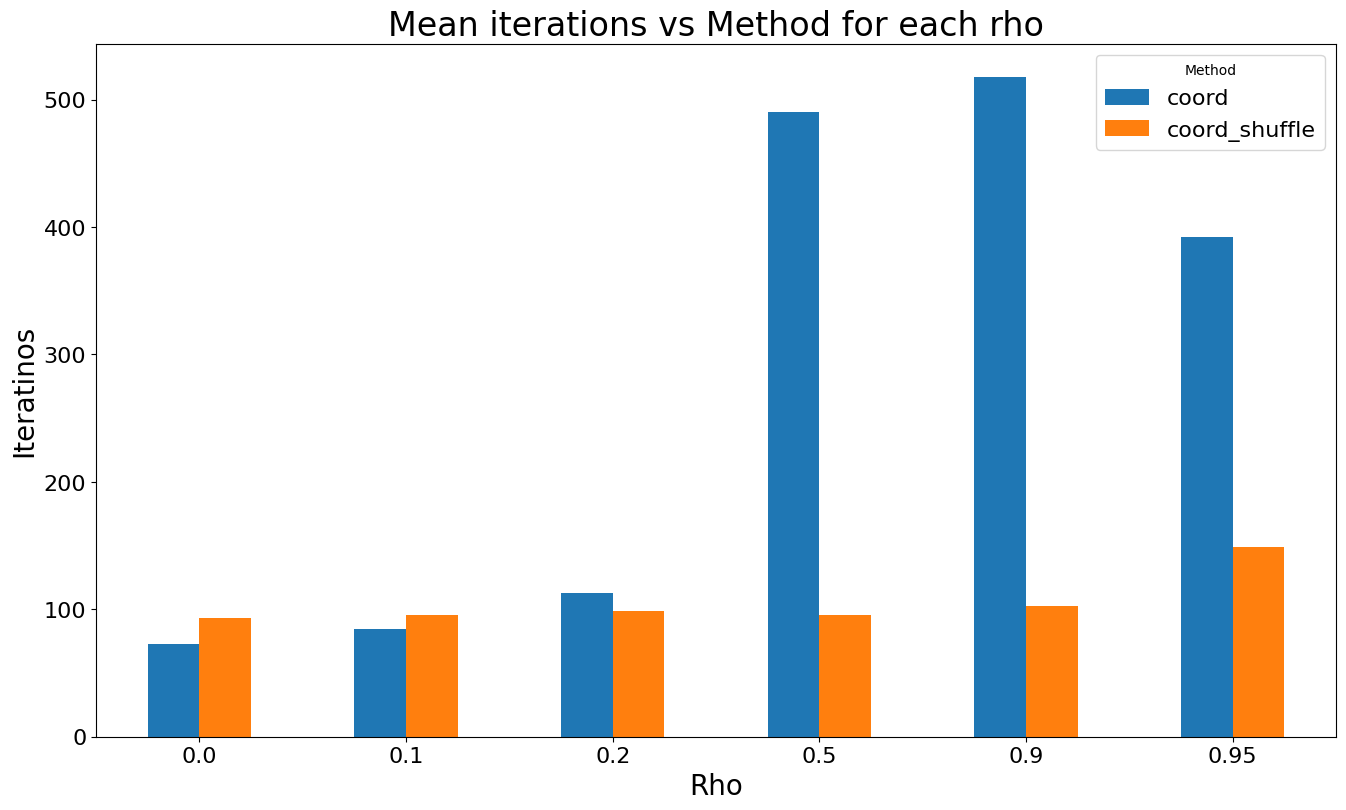

In [25]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['rho', 'method'])['it'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('Rho', fontsize=20)
plt.ylabel('Iteratinos', fontsize=20)
plt.title('Mean iterations vs Method for each rho', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()

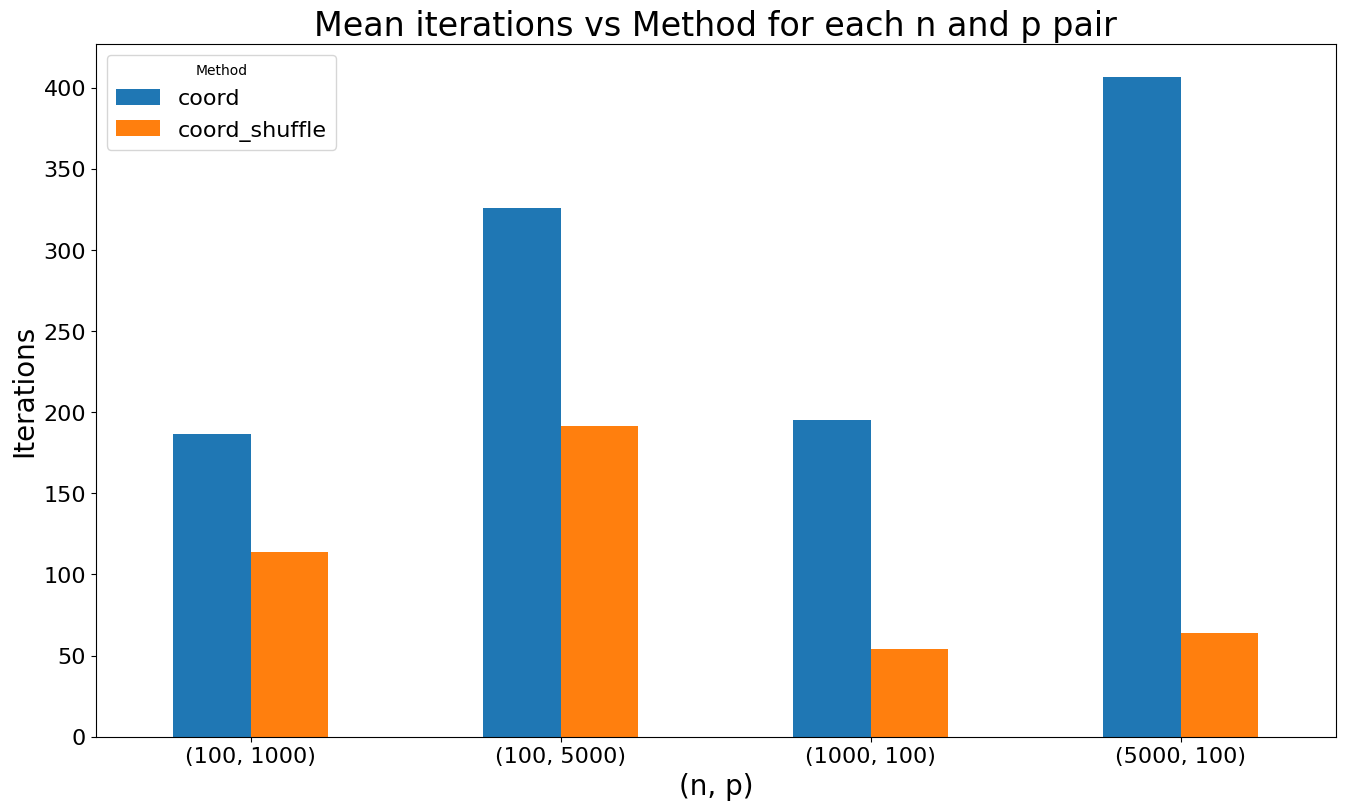

In [26]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['n', 'p', 'method'])['it'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('(n, p)', fontsize=20)
plt.ylabel('Iterations', fontsize=20)
plt.title('Mean iterations vs Method for each n and p pair', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()

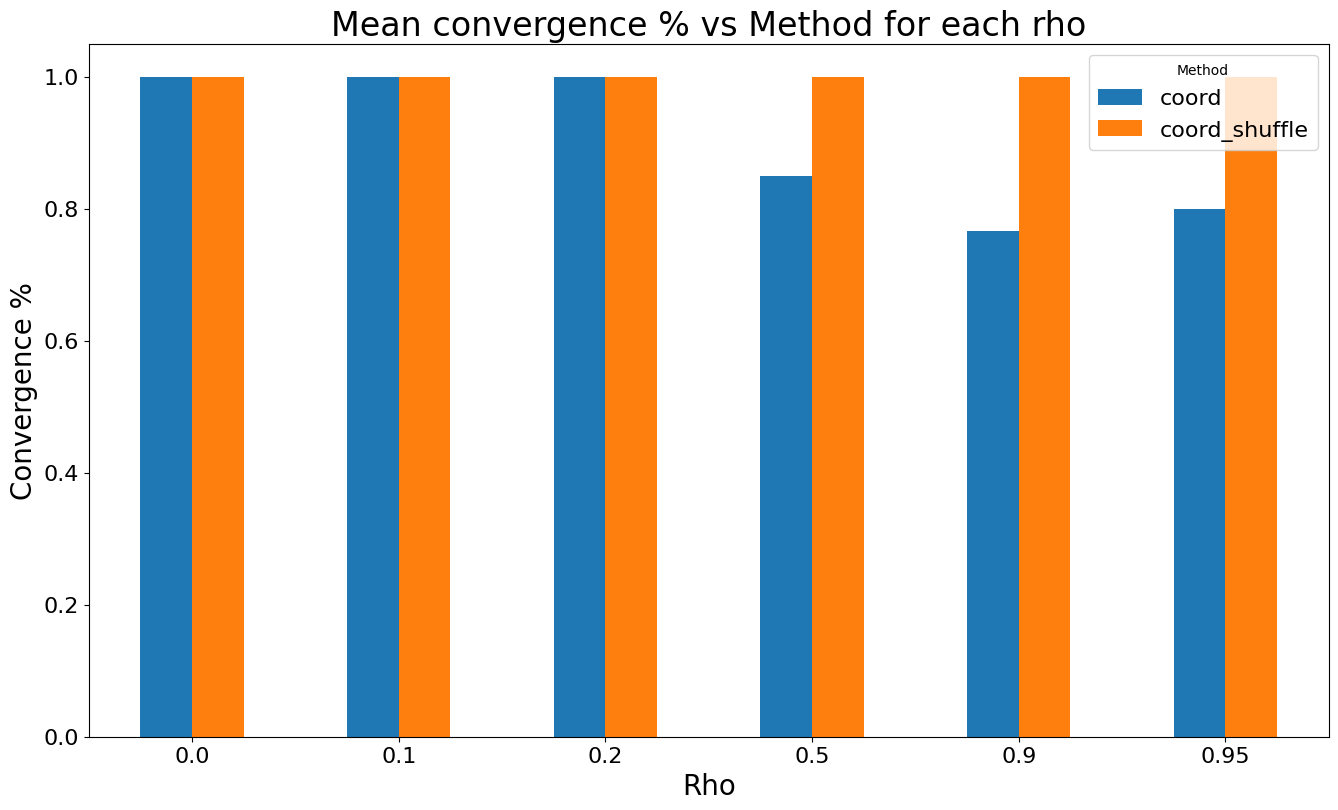

In [36]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['rho', 'method'])['conv'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('Rho', fontsize=20)
plt.ylabel('Convergence %', fontsize=20)
plt.title('Mean convergence % vs Method for each rho', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()

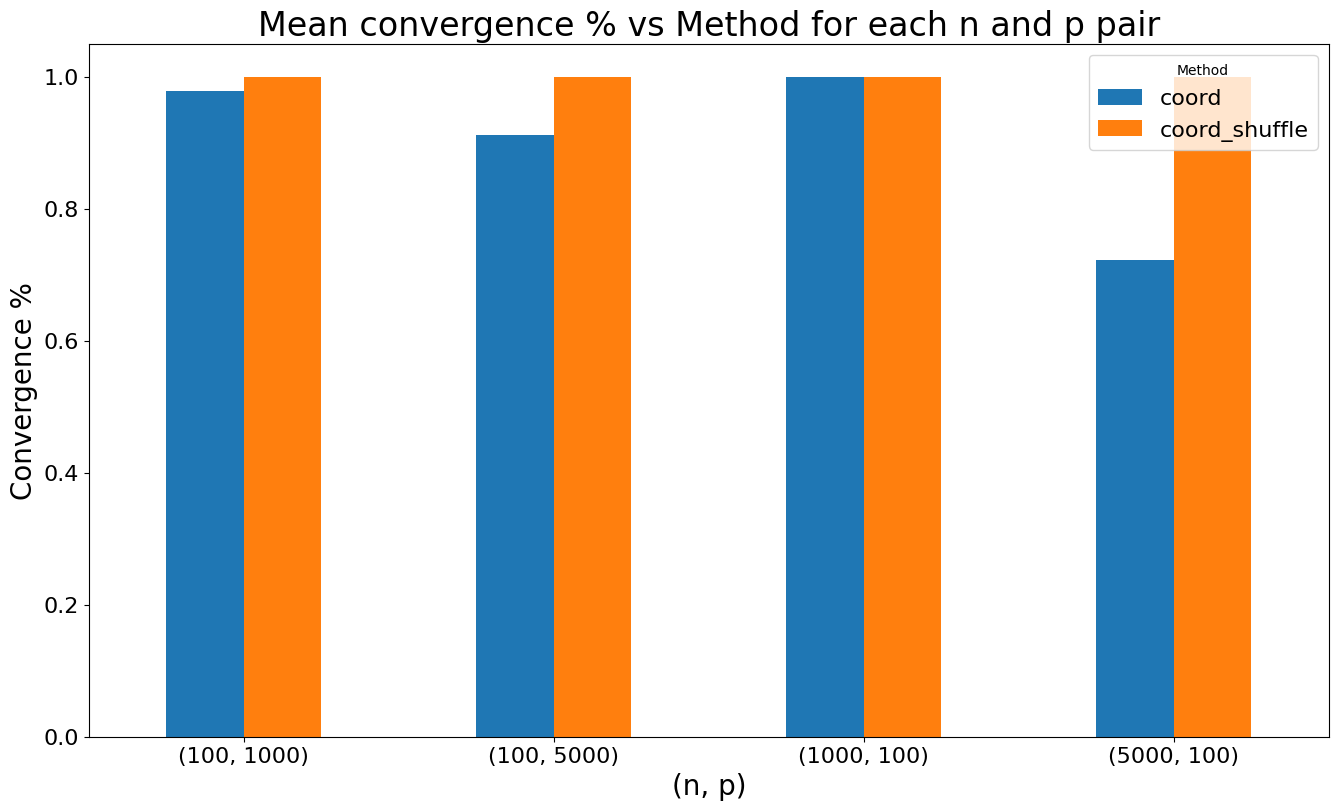

In [37]:
# mean time for each method for each rho
mean_time = df[df["method"] != "LARS"].groupby(['n', 'p', 'method'])['conv'].mean()
mean_time = mean_time.unstack()
mean_time.plot(kind='bar', figsize=(16, 9))
plt.xlabel('(n, p)', fontsize=20)
plt.ylabel('Convergence %', fontsize=20)
plt.title('Mean convergence % vs Method for each n and p pair', fontsize=24)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(title='Method', fontsize=16)
plt.show()